# Chapter 9 Plotting and Visualization

Making informative visualizations is one of the most important tasks in data analysis. It may serve the purpose for:

- Data exploration
- Getting ideas for building models
- Present findings

Let's start with matplotlib, a widely-used Python library for making plots.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Exercise: Exploring NYC Taxi Data
Please download train.zip from [Kaggle](https://www.kaggle.com/c/nyc-taxi-trip-duration/data)

In [2]:
# Extract files
import zipfile
# if not os.path.exists("Data"):
#     os.mkdir("Data")
with zipfile.ZipFile("Data/train.zip", "r") as file:
    file.printdir()
    file.extractall("Data/nyctaxi")

File Name                                             Modified             Size
train.csv                                      2017-07-19 11:26:56    200589097


In [3]:
taxidata = pd.read_csv("Data/nyctaxi/train.csv", delimiter=",")

In [4]:
taxidata.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
print("Shape:", taxidata.shape)

Shape: (1458644, 11)


In [6]:
print("Feature names:", ", ".join(taxidata.columns))

Feature names: id, vendor_id, pickup_datetime, dropoff_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, trip_duration


In [7]:
print("Data types:", taxidata.dtypes)

Data types: id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


In [8]:
# Change the data type of datetime columns
taxidata['pickup_datetime'] = taxidata['pickup_datetime'].astype(
    np.datetime64)

C:\Users\ch002\Anaconda3\lib\site-packages\pandas\core\internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


In [9]:
taxidata['dropoff_datetime'] = taxidata['dropoff_datetime'].astype(
                                np.datetime64)

C:\Users\ch002\Anaconda3\lib\site-packages\pandas\core\internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


In [10]:
print("Data Types:", taxidata.dtypes)

Data Types: id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object


In [11]:
# Missing values?
pd.isnull(taxidata).sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [12]:
# Look at statistics of numerical features
taxidata.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## Visualization Task 1: Distribution of each column

**Vender IDs**

Text(0,0.5,'Frequency')

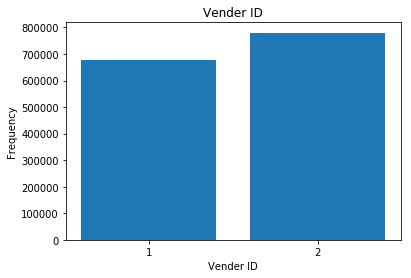

In [13]:
# plt.hist(taxidata['vendor_id'])
freqs = taxidata['vendor_id'].value_counts()
# plt.bar(freqs.index, freqs.values)
# plt.title("Vendor ID")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Vender ID")
ax.bar(freqs.index, freqs.values)
ax.set_xticks([1, 2])
ax.set_xlabel("Vender ID")
ax.set_ylabel("Frequency")

Text(0.5,1,'Vender ID = 2')

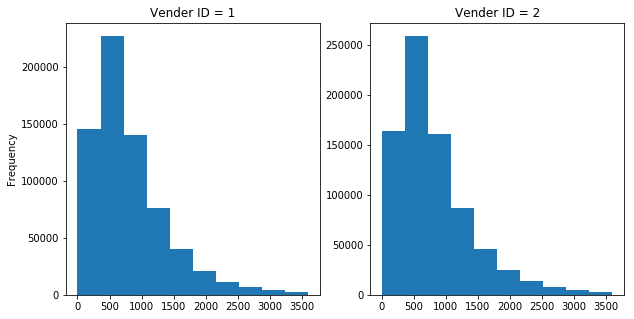

In [14]:
# Extract trips with Vender ID 1.
index_id1 = (taxidata['vendor_id'] == 1)
taxidata_id1 = taxidata[index_id1]

# Extract trips with Vender ID 2.
index_id2 = (taxidata['vendor_id'] == 2)
taxidata_id2 = taxidata[index_id2]

# Show the historgram of trip duration
# plt.hist(taxidata_id1['trip_duration'], range=(0, 3600)) # need to remove the outliners first
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(taxidata_id1['trip_duration'], range=(0, 3600))
ax1.set_title("Vender ID = 1")
ax1.set_ylabel("Frequency")
ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(taxidata_id2['trip_duration'], range=(0, 3600))
ax2.set_title("Vender ID = 2")

Conclusion: Vender ID does not influence trip duration.

**Passenger count**

In [15]:
taxidata['passenger_count'].value_counts().sort_index()

0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: passenger_count, dtype: int64

There are 60 trips with no passenger. We should remove those instances from the data frame.

In [16]:
# Remove rows where passenger count is zero
index = (taxidata['passenger_count'] != 0)
# Show the selected rows
# df = taxidata[index]
# df

# Remove these rows from taxidata
taxidata_1 = taxidata[index]
index_1 = (taxidata_1['passenger_count'] == 0)
taxidata_1[index_1].shape

# Overwrite taxidata with taxidata_1
taxidata = taxidata_1
taxidata.shape

(1458584, 11)

**Flag**

In [17]:
# What are the values in this column?
print(set(taxidata['store_and_fwd_flag']))

# What are the frequencies?
print(taxidata['store_and_fwd_flag'].value_counts())

# Compare the histogram of trip duration for Yes and No (HOMEWORK #1)


{'N', 'Y'}
N    1450542
Y       8042
Name: store_and_fwd_flag, dtype: int64


**Trip duration**

In [18]:
# Investigate outliers

# Extract trips longer than 10 hours
# taxidata_long = taxidata[taxidata['trip_duration'] > 36000]
# taxidata_long.head(10)

# Extract trips shorter than 10 seconds
# taxidata_short = taxidata[taxidata['trip_duration'] < 60]
# print(taxidata_short.shape)
# taxidata_short.sample(10)

# Remove trips whose duration is longer than 7200 or less than 60
index = (taxidata['trip_duration'] >= 60) & (taxidata['trip_duration'] < 7200) 
# & symbol performs element-wise "and" operation for two lists
taxidata = taxidata[index]
print("Min:", taxidata['trip_duration'].min())
print("Max:", taxidata['trip_duration'].max())
print("Shape:", taxidata.shape)

Min: 60
Max: 7191
Shape: (1447779, 11)


In [19]:
list1 = np.array([True, True, False, False])
list2 = np.array([True, False, True, False])
list1 & list2

array([ True, False, False, False])

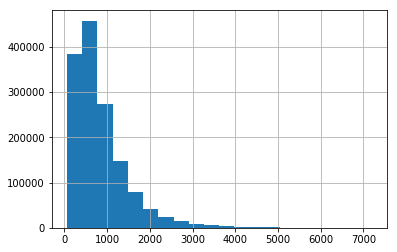

In [20]:
# plt.hist(taxidata['trip_duration'], bins=20)
taxidata['trip_duration'].hist(bins=20)

**Pick-up and drop-off datetime**

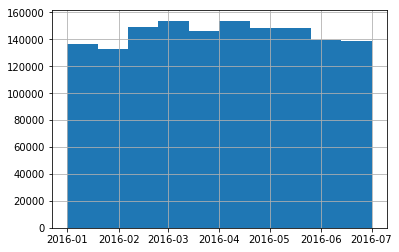

In [21]:
taxidata['pickup_datetime'].hist()

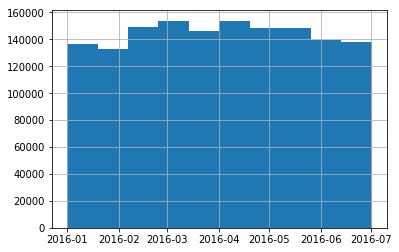

In [43]:
taxidata['dropoff_datetime'].hist()

**Longitudes and Latitudes**

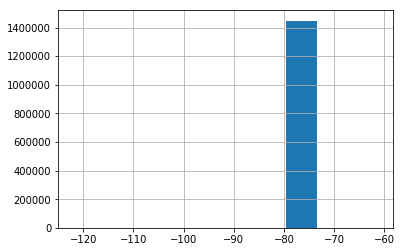

In [46]:
# Longitudes:
taxidata['pickup_longitude'].hist()

In [64]:
# A few outliers make the histogram not informational.
# Let's look at some extreme instances.

# index = (taxidata['pickup_longitude'] < -80)
# taxidata_temp = taxidata[index]
# taxidata_temp.head(10)

# index = (taxidata['pickup_longitude'] > -70)
# taxidata_temp = taxidata[index]
# taxidata_temp.head()
# taxidata_temp.shape

# Remove instances whose pickup longitude is < -80 or > -70
index = (taxidata['pickup_longitude'] < -74.1) | (taxidata['pickup_longitude'] > -73.7)
taxidata1 = taxidata[~index]
taxidata1.shape

(1447565, 11)

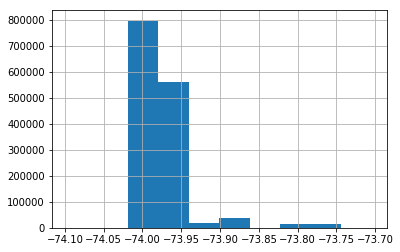

In [65]:
# Plot the histogram again
taxidata1['pickup_longitude'].hist()

In [88]:
taxidata = taxidata1

In [89]:
taxidata['pickup_latitude'].min()

40.22580337524415

In [90]:
# Remove the bottom 0.001% data for pickup_latitude
lower_limit = np.percentile(taxidata['pickup_latitude'], 0.002)
print(lower_limit)
index1 = (taxidata['pickup_latitude'] < lower_limit)
taxidata_temp = taxidata[index1]
print(taxidata_temp.shape)
taxidata_temp.head()

40.57657102905274
(29, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
47554,id0367149,2,2016-01-09 14:58:08,2016-01-09 15:13:20,1,-74.079620,40.449749,-74.062263,40.444698,N,912
55362,id2566010,1,2016-06-25 09:52:58,2016-06-25 10:08:39,1,-73.998886,40.572735,-73.950859,40.596786,N,941
61068,id3369460,1,2016-03-12 16:46:39,2016-03-12 16:52:15,1,-73.749413,40.525162,-73.748505,40.525509,N,336
65755,id2154076,2,2016-02-18 20:33:55,2016-02-18 20:41:13,1,-73.995270,40.551376,-74.004272,40.552326,N,438
73032,id2255271,2,2016-01-16 10:03:02,2016-01-16 10:12:44,1,-74.069733,40.433842,-74.082153,40.441662,N,582


In [91]:
# Remove the top 0.001% of data
upper_limit = np.percentile(taxidata['pickup_latitude'], 99.999)
print(upper_limit)
index2 = (taxidata['pickup_latitude'] > upper_limit)
taxidata_temp = taxidata[index2]
print(taxidata_temp.shape)
taxidata_temp.head()

40.98722946136462
(15, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
186174,id1367238,1,2016-06-20 11:20:13,2016-06-20 11:37:49,1,-73.774055,41.157372,-73.705620,41.071087,N,1056
219212,id0686057,1,2016-05-25 17:57:25,2016-05-25 17:58:26,1,-73.724586,41.106907,-73.724586,41.106907,N,61
613001,id0210104,1,2016-03-11 19:30:58,2016-03-11 19:33:16,1,-73.804680,41.042744,-73.804657,41.042740,N,138
693620,id0459122,1,2016-06-06 21:55:39,2016-06-06 21:56:56,1,-73.754311,40.991917,-73.754311,40.991917,N,77
739380,id1013417,1,2016-03-25 00:48:56,2016-03-25 00:50:01,1,-73.809433,40.987995,-73.809433,40.987995,N,65


In [92]:
# Remove data
taxidata = taxidata[(~index1)&(~index2)]
taxidata.shape

(1447521, 11)

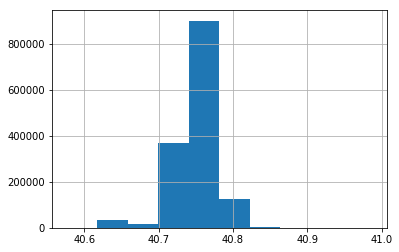

In [93]:
taxidata['pickup_latitude'].hist()

(40.6, 40.9)

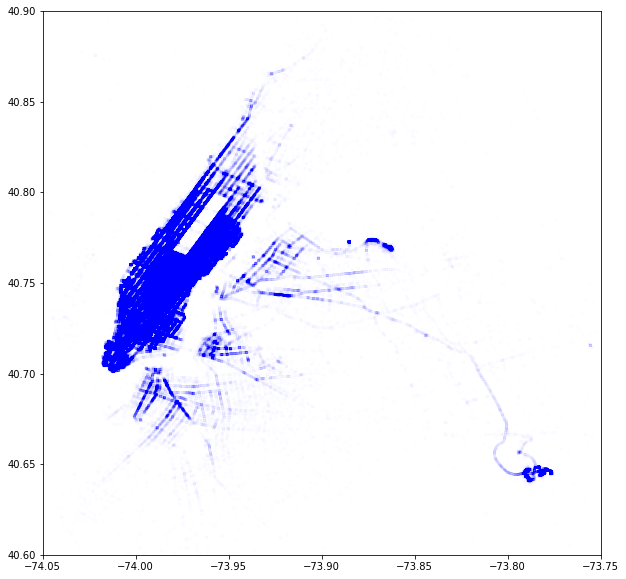

In [101]:
# Another attempt to visualize longitude and latitude: plot the map
plt.figure(figsize=(10, 10))
plt.plot(taxidata['pickup_longitude'],
         taxidata['pickup_latitude'],
         
         'b.',
         alpha=0.005)
plt.xlim(-74.05, -73.75)
plt.ylim(40.6, 40.9)

(40.6, 40.9)

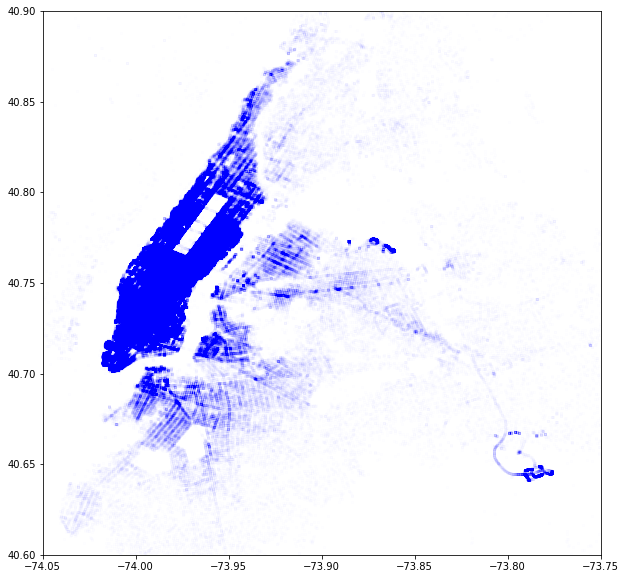

In [102]:
# Plot dropoff locations
plt.figure(figsize=(10, 10))
plt.plot(taxidata['dropoff_longitude'],
         taxidata['dropoff_latitude'],
         
         'b.',
         alpha=0.005)
plt.xlim(-74.05, -73.75)
plt.ylim(40.6, 40.9)

## Consistency Check
- Is dropoff_time always greater than pickup_time?
- Is the difference between dropoff_time and pickup_time equal to trip_duration?
- Is the difference between dropoff_time and pickup_time too large to be accurate?
- Is the difference between dropoff_time and pickup_time too small to be accurate?

In [24]:
# Is dropoff_time always greater than pickup_time?



In [25]:
# Is the difference between dropoff_time and pickup_time equal to trip_duration?



In [26]:
# Is the difference between dropoff_time and pickup_time too large to be accurate?



In [27]:
# Is the difference between dropoff_time and pickup_time too small to be accurate?



## Visualization Task 2: Correlations between a feature and trip_duration

In [28]:
# passenger count vs. trip duration



In [29]:
# pickup location vs. trip duration



In [30]:
# dropoff location vs. trip duration



## Feature engineering
The raw data usually is not the best way to provide useful features for a specific task. Therefore it is a crucial ability for a data scientist to create more meaningful features from the dataset.

- Hour of the day
- Day of the week
- Aerial distance

In [103]:
# hour of the day vs. trip duration

# Extract the hour value from pickup datetime
taxidata['pickup_hour'] = taxidata['pickup_datetime'].dt.hour
taxidata.head()

C:\Users\ch002\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13


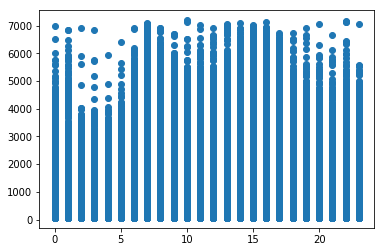

In [105]:
plt.scatter(taxidata['pickup_hour'], taxidata['trip_duration'])

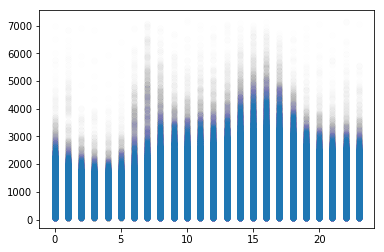

In [106]:
plt.scatter(taxidata['pickup_hour'], taxidata['trip_duration'], alpha=0.005)

- long trips (>4000 sec) tend to happen between 3PM and 6PM
- during late night (2AM to 5AM), trip tend to be less than 2000 sec)

In [108]:
# day of the week vs. trip duration
taxidata['dayofweek'] = taxidata['pickup_datetime'].dt.dayofweek
taxidata.head()

C:\Users\ch002\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,dayofweek
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,5


In [109]:
# Aerial distance vs. trip duration
taxidata['aerial_dist'] = np.sqrt((taxidata['pickup_longitude'] - taxidata['dropoff_longitude']) ** 2 \
                                 + (taxidata['pickup_latitude'] - taxidata['dropoff_latitude']) ** 2)


C:\Users\ch002\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(0, 0.5)

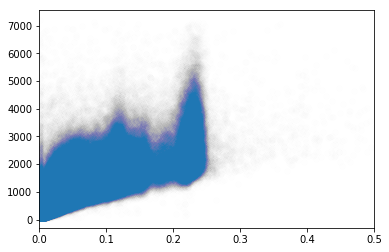

In [111]:
plt.scatter(taxidata['aerial_dist'], taxidata['trip_duration'], alpha=0.005)
plt.xlim(0, 0.5)

There is a strong correlation between areial distance and trip duration

In [112]:
print("Correlation coefficient:", np.corrcoef(taxidata['aerial_dist'], taxidata['trip_duration']))

Correlation coefficient: [[1.         0.73972708]
 [0.73972708 1.        ]]


The trip duration is affected by many factors at the same time, and thus a good prediction method should account for all these factors. To further investigate the problem of predicting taxi trip duration, one would need to develop multi-variate statistical models (strong assumption on the distribution of data) or machine learning models (weak assumption on the distribution of data). If you are interested, look into the discussion in the [notebook section on Kaggle.com](https://www.kaggle.com/c/nyc-taxi-trip-duration/notebooks).

## Annotations 

In [34]:
# Load the bitcoin price data
import json
import requests
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
data = pd.DataFrame(json.loads(res.content)['Data'])
data = data.set_index('time')
data.index = pd.to_datetime(data.index, unit='s')
data.tail(3)

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2019-10-14,8363.94,8414.24,8228.06,8296.34,17507.78,1.460155e+08
2019-10-15,8173.48,8439.31,8116.92,8363.94,24899.11,2.056746e+08
2019-10-16,7970.71,8193.41,7945.77,8173.48,29069.29,2.343167e+08


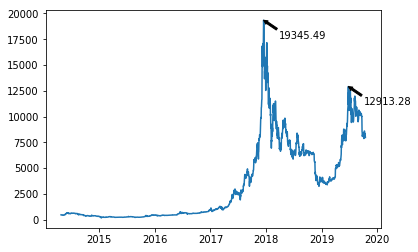

In [35]:
from datetime import datetime, timedelta
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(data['close'])

peaks = [
    (datetime(2017, 12, 16), '19345.49'),
    (datetime(2019, 6, 26), '12913.28')
]

for date, label in peaks:
    ax.annotate(label,
                xy=(date, data.asof(date)['close']),
                xytext=(date+timedelta(days=100), data.asof(date)['close']-1000),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left',
                verticalalignment='top')


In [36]:
# Add low points to the figure



# Homework
The JFK international airport is located within longitude -73.82 to -73.78 and latitude 40.63 to 40.67. Extract all taxi trips who picked up passengers from this area.
1. For this sub-dataset only, visualize the correlation between the aerial distance and the trip duration.
2. For this sub-dataset only, visualize the drop-off location using dropoff_longitude and dropoff_latitude.
3. There was a snow storm on Jan 23, 2016. Is the distribution of trip_duration on that day different from the rest of the year?